<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/quantumfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum in Finance**

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

import random
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.special

### **Quantum Walks for Risk Management**

E[W(2)] = 125.56266721287383
E[W(5)] = 138.80425838124148


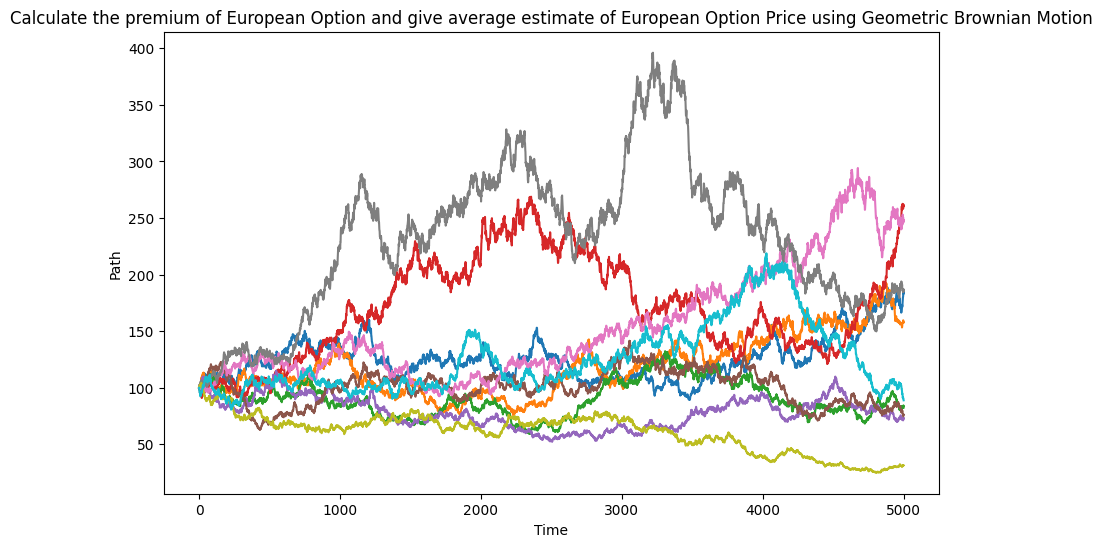

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(paths=10, count=5000, mean=0.06, sigma=0.3, S0=100):
    interval = 5 / count
    sample = np.zeros((count + 1, paths))
    sample[0, :] = S0

    for i in range(paths):
        for j in range(1, count + 1):
            sample[j, i] = sample[j - 1, i] * np.exp(
                interval * (mean - (sigma**2) / 2) + (interval**0.5) * np.random.normal(0, 1) * sigma
            )

    print(f"E[W(2)] = {np.mean(sample[2000, :])}")
    print(f"E[W(5)] = {np.mean(sample[5000, :])}")

    plt.figure(figsize=(10, 6))
    plt.plot(sample)
    plt.title("Calculate the premium of European Option and give average estimate of European Option Price using Geometric Brownian Motion")
    plt.xlabel("Time")
    plt.ylabel("Path")
    plt.show()

geometric_brownian_motion()

E[W(2)] = 124.03194427490234
E[W(5)] = 131.8700408935547


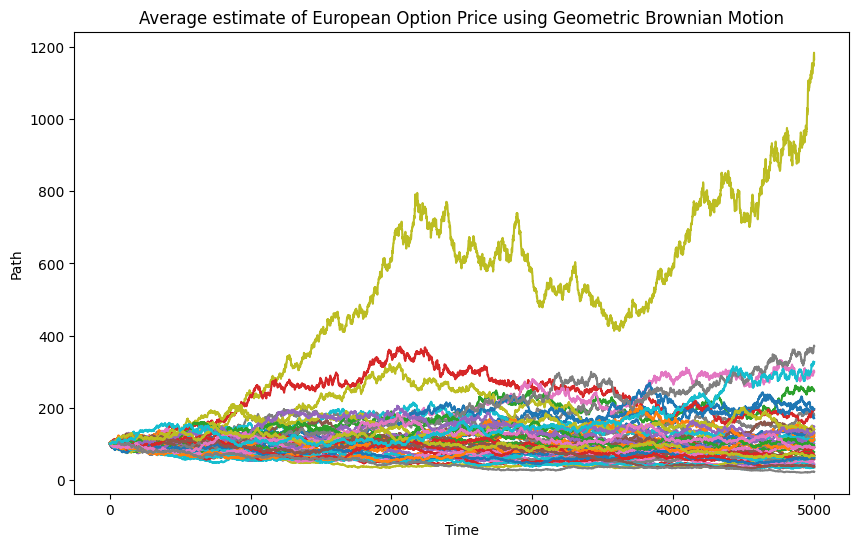

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

# paths: Number of paths to simulate.
# count: Number of time steps.
# mean: Mean (drift) of the GBM.
# sigma: Volatility of the GBM.
# S0: Initial stock price.

def geometric_brownian_motion(paths=50, count=5000, mean=0.06, sigma=0.3, S0=100):
    interval = 5 / count
    key = random.PRNGKey(0)  # Random seed for reproducibility

    # Initialize sample matrix with zeros
    sample = jnp.zeros((count + 1, paths))
    sample = sample.at[0, :].set(S0)

    def body_fun(i, val):
        key, sample = val
        key, subkey = random.split(key)
        dW = random.normal(subkey, (paths,)) * jnp.sqrt(interval)
        growth_factor = jnp.exp(interval * (mean - 0.5 * sigma**2) + sigma * dW)
        sample = sample.at[i, :].set(sample[i - 1, :] * growth_factor)
        return key, sample

    key, sample = jax.lax.fori_loop(1, count + 1, body_fun, (key, sample))

    print(f"E[W(2)] = {jnp.mean(sample[2000, :])}")
    print(f"E[W(5)] = {jnp.mean(sample[5000, :])}")

    sample = jax.device_get(sample)  # Transfer data from device to host for plotting

    plt.figure(figsize=(10, 6))
    for path in range(paths):
        plt.plot(sample[:, path])
    plt.title("Average estimate of European Option Price using Geometric Brownian Motion")
    plt.xlabel("Time")
    plt.ylabel("Path")
    plt.show()

geometric_brownian_motion()

https://towardsdatascience.com/monte-carlo-simulation-in-r-with-focus-on-financial-data-ad43e2a4aedf

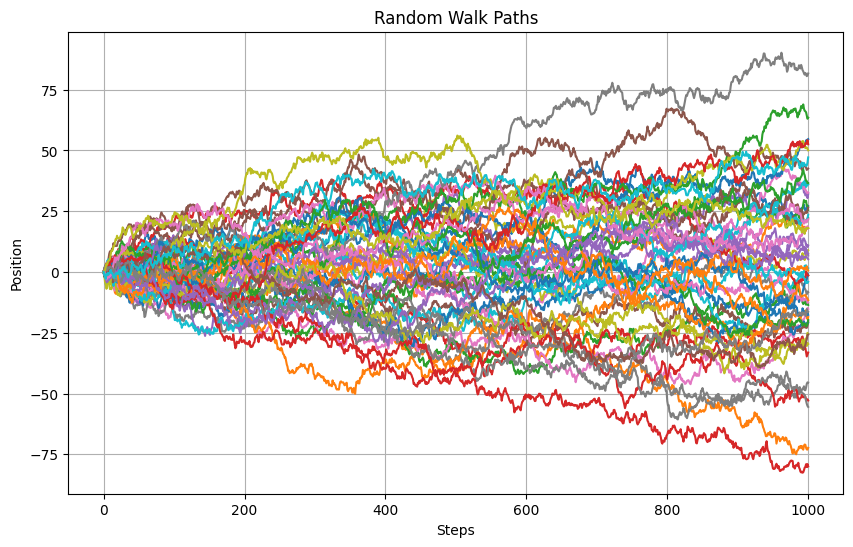

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

def random_walk(key, steps, paths):
    # Generate random steps from a normal distribution
    key, subkey = random.split(key)
    steps_array = random.normal(subkey, (steps, paths))

    # Calculate the cumulative sum to get the random walk paths
    random_walk_paths = jnp.cumsum(steps_array, axis=0)

    # Add initial position (0) at the start of each path
    random_walk_paths = jnp.vstack([jnp.zeros(paths), random_walk_paths])

    return random_walk_paths

# Parameters
steps = 1000   # Number of steps
paths = 50     # Number of paths
key = random.PRNGKey(0)  # Random seed for reproducibility

# Simulate random walk
random_walk_paths = random_walk(key, steps, paths)

# Transfer data from device to host for plotting
random_walk_paths = jax.device_get(random_walk_paths)

# Plot the random walk paths
plt.figure(figsize=(10, 6))
for path in range(paths):
    plt.plot(random_walk_paths[:, path])
plt.title("Random Walk Paths")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.grid(True)
plt.show()


[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4), cirq.GridQubit(0, 5), cirq.GridQubit(0, 6)]
Counter({12: 1214, 14: 655, 20: 331, 10: 300, 16: 275, 52: 261, 18: 220, 48: 167, 22: 153, 28: 145, 54: 140, 42: 128, 32: 121, 26: 114, 34: 110, 40: 109, 36: 107, 30: 107, 24: 86, 38: 85, 44: 62, 46: 46, 50: 36, 8: 15, 56: 12, 58: 1})


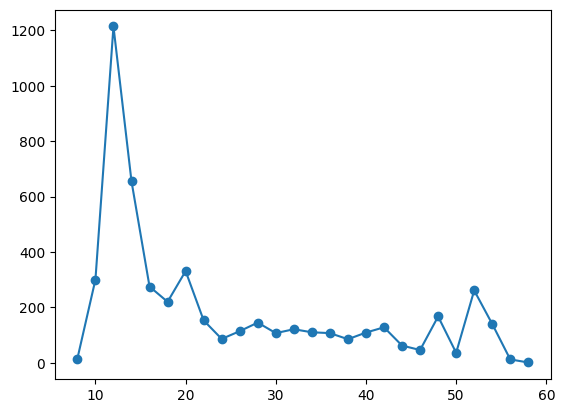

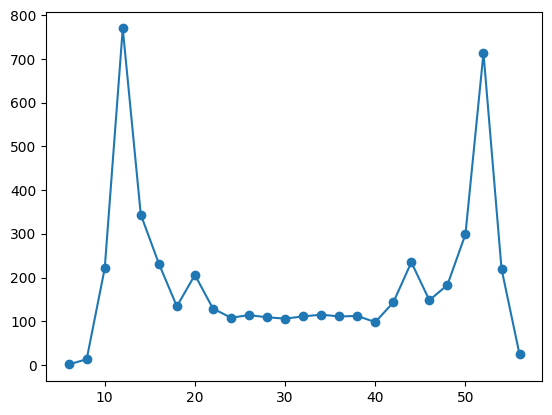

In [ ]:
!pip install --quiet cirq
import cirq
from matplotlib import pyplot as plt

number_qubits = 7
qubits = cirq.GridQubit.rect(1, number_qubits)

print(qubits)

def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

def walk_step():

    # "Flip" the coin vector

    yield cirq.H.on(cirq.GridQubit(0, number_qubits))

    # Implement the Addition Operator

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    for i in range(number_qubits, 0, -1):

        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i > 1):
            yield cirq.X.on(cirq.GridQubit(0, i-1))

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    # Implement the Subtraction Operator

    for i in range(1, number_qubits+1):

        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i < number_qubits):
            yield cirq.X.on(cirq.GridQubit(0, i))

number_qubits = 7
iterator = 30
sample_number = 5000

def generate_walk(number_qubits, iterator, sample_number):

    circuit = cirq.Circuit()

    circuit.append(initial_state())
    for j in range(iterator):
        circuit.append(walk_step())
    circuit.append(cirq.measure(*qubits, key='x'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')

    return final

final = generate_walk(number_qubits, iterator, sample_number)
print(final)

def graph(final):

    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()]

    x_arr_final = []
    y_arr_final = []

    while (len(x_arr) > 0):

        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]

    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.show()

graph(final)

def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    yield cirq.S.on(cirq.GridQubit(0, number_qubits))

final = generate_walk(number_qubits, iterator, sample_number)
graph(final)

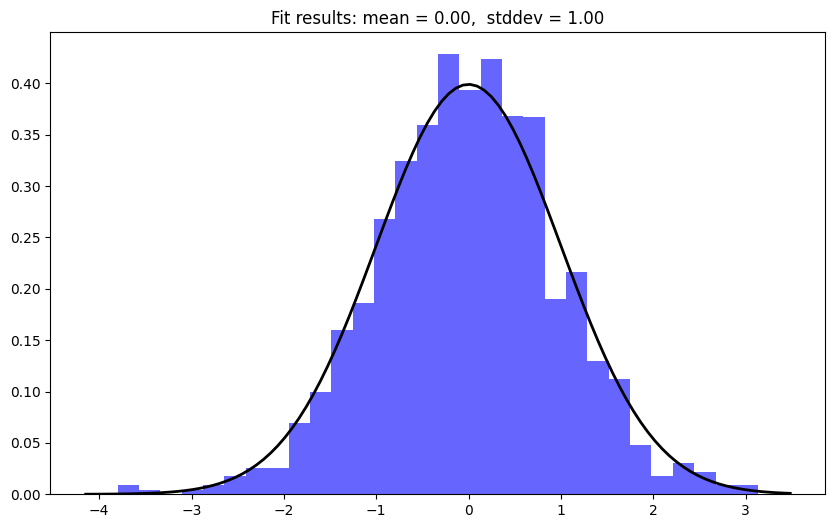

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

def generate_normal_distribution(key, mean=0.0, stddev=1.0, num_samples=1000):
    """
    Generate samples from a normal distribution using JAX.

    Parameters:
    key: PRNGKey
        JAX random key for reproducibility.
    mean: float
        Mean of the normal distribution.
    stddev: float
        Standard deviation of the normal distribution.
    num_samples: int
        Number of samples to generate.

    Returns:
    jnp.ndarray
        Samples from the normal distribution.
    """
    samples = mean + stddev * random.normal(key, (num_samples,))
    return samples

# Parameters
mean = 0.0          # Mean of the distribution
stddev = 1.0        # Standard deviation of the distribution
num_samples = 1000  # Number of samples to generate
key = random.PRNGKey(0)  # Random seed for reproducibility

# Generate normal distribution samples
samples = generate_normal_distribution(key, mean, stddev, num_samples)

# Transfer data from device to host for plotting
samples = jax.device_get(samples)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Plot the theoretical normal distribution curve
xmin, xmax = plt.xlim()
x = jnp.linspace(xmin, xmax, 100)
p = jax.scipy.stats.norm.pdf(x, mean, stddev)
plt.plot(x, p, 'k', linewidth=2)

title = "Normal Distribution (Fit results: mean = %.2f,  stddev = %.2f)" % (mean, stddev)
plt.title(title)
plt.show()


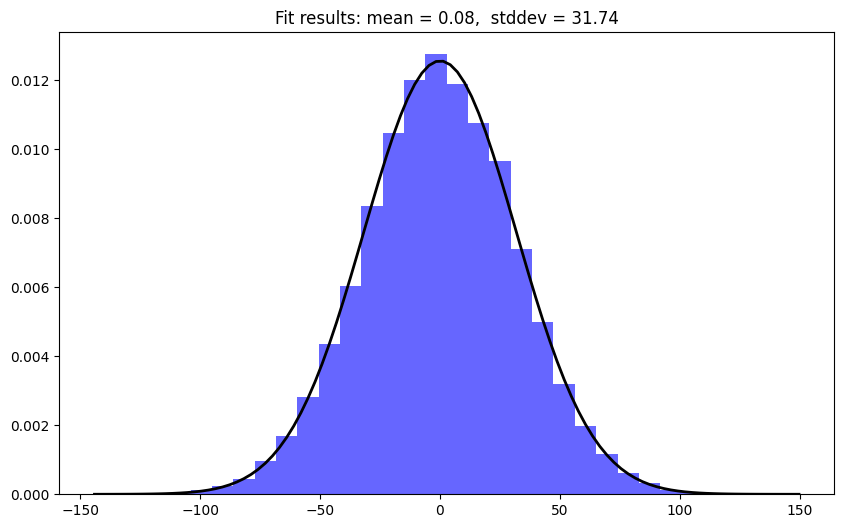

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

def random_walk(key, steps=1000, paths=10000):
    """
    Simulate multiple random walk paths and return the final positions.

    Parameters:
    key: PRNGKey
        JAX random key for reproducibility.
    steps: int
        Number of steps in the random walk.
    paths: int
        Number of paths to simulate.

    Returns:
    jnp.ndarray
        Final positions of the random walk paths.
    """
    # Generate random steps from a normal distribution
    key, subkey = random.split(key)
    steps_array = random.normal(subkey, (steps, paths))

    # Calculate the cumulative sum to get the random walk paths
    random_walk_paths = jnp.cumsum(steps_array, axis=0)

    # Return the final positions of the random walk paths
    final_positions = random_walk_paths[-1, :]
    return final_positions

# Parameters
steps = 1000   # Number of steps
paths = 10000  # Number of paths
key = random.PRNGKey(0)  # Random seed for reproducibility

# Simulate random walk
final_positions = random_walk(key, steps, paths)

# Transfer data from device to host for plotting
final_positions = jax.device_get(final_positions)

# Plot the histogram of the final positions
plt.figure(figsize=(10, 6))
plt.hist(final_positions, bins=30, density=True, alpha=0.6, color='b')

# Plot the theoretical normal distribution curve
mean_final = jnp.mean(final_positions)
stddev_final = jnp.std(final_positions)
xmin, xmax = plt.xlim()
x = jnp.linspace(xmin, xmax, 100)
p = jax.scipy.stats.norm.pdf(x, mean_final, stddev_final)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mean = %.2f,  stddev = %.2f" % (mean_final, stddev_final)
plt.title(title)
plt.show()


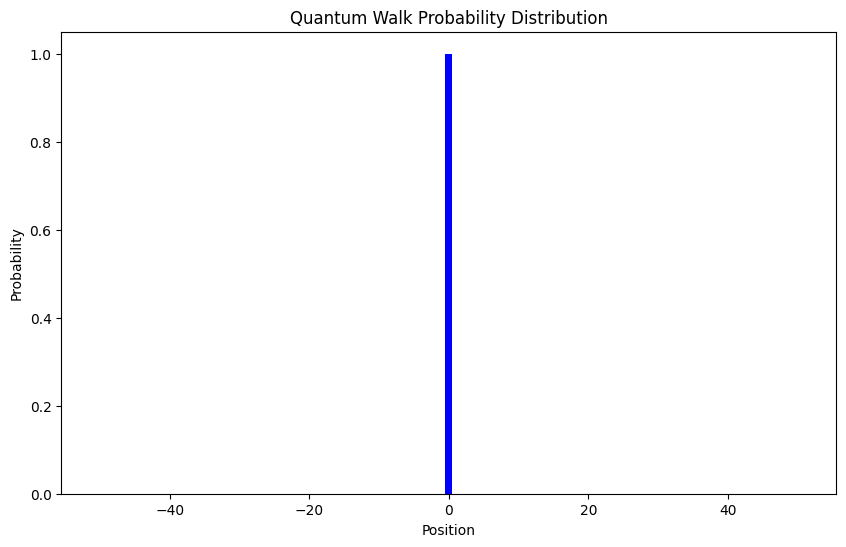

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random, grad, jit

def hadamard_gate():
    return jnp.array([[1, 1], [1, -1]]) / jnp.sqrt(2)

def coin_operator(state):
    H = hadamard_gate()
    return jnp.kron(H, jnp.eye(state.shape[0] // 2)) @ state

def shift_operator(state):
    dim = state.shape[0] // 2
    shift_right = jnp.roll(jnp.eye(dim), 1, axis=1)
    shift_left = jnp.roll(jnp.eye(dim), -1, axis=1)
    shift = jnp.block([[shift_right, jnp.zeros((dim, dim))],
                       [jnp.zeros((dim, dim)), shift_left]])
    return shift @ state

def quantum_walk(num_steps, initial_position):
    dim = 2 * num_steps + 1
    state = jnp.zeros((2, dim))
    state = state.at[0, initial_position + num_steps].set(1.0)  # Start at the initial position

    for _ in range(num_steps):
        state = coin_operator(state)
        state = shift_operator(state)

    probabilities = jnp.abs(state[0, :]**2 + state[1, :]**2)
    return probabilities

# Parameters
num_steps = 50
initial_position = 0
key = random.PRNGKey(0)  # Random seed for reproducibility

# Simulate quantum walk
probabilities = quantum_walk(num_steps, initial_position)

# Transfer data from device to host for plotting
probabilities = jax.device_get(probabilities)

# Plot the probability distribution
plt.figure(figsize=(10, 6))
plt.bar(range(-num_steps, num_steps + 1), probabilities, width=1.0, color='b')
plt.title("Quantum Walk Probability Distribution")
plt.xlabel("Position")
plt.ylabel("Probability")
plt.show()


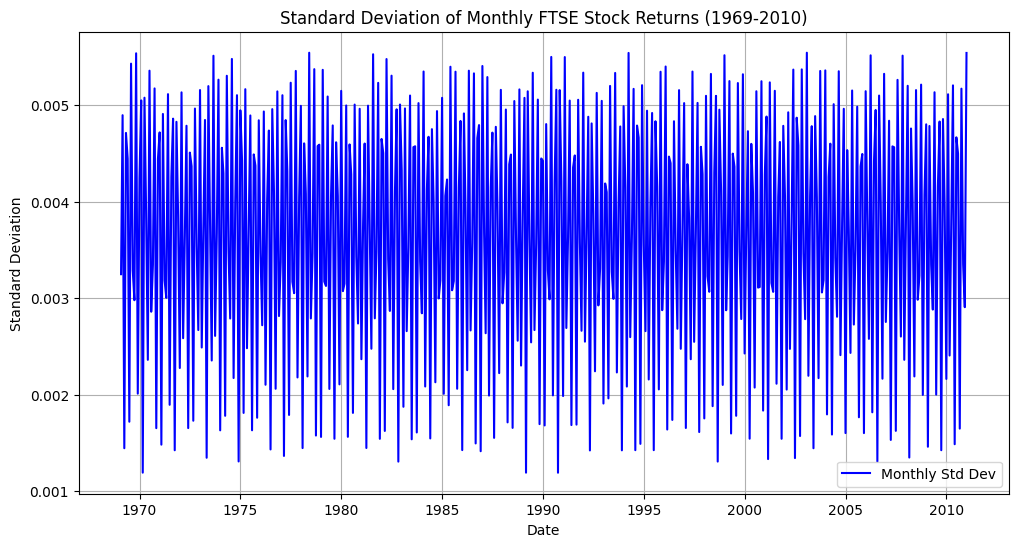

In [ ]:
import jax
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt

# Load your daily return data into a Pandas DataFrame
# Assume `df` is the DataFrame containing the daily returns
# with columns 'Date' and 'Return'

# Example of loading data
# df = pd.read_csv('daily_returns.csv', parse_dates=['Date'])

# Here we create a dummy DataFrame for illustration
dates = pd.date_range(start='1969-01-01', end='2010-12-31', freq='B')  # Business days
returns = jnp.sin(jnp.linspace(0, 1000, len(dates))) * 0.01  # Simulated returns
df = pd.DataFrame({'Date': dates, 'Return': returns})

# Ensure the data is sorted by date
df = df.sort_values(by='Date')

# Set the date as the index
df.set_index('Date', inplace=True)

# Calculate the standard deviation of monthly returns
monthly_std_dev = df['Return'].resample('M').std()

# Convert to JAX arrays for any further JAX-specific computations
monthly_std_dev_jax = jnp.array(monthly_std_dev)

# Plot the standard deviation of monthly returns
plt.figure(figsize=(12, 6))
plt.plot(monthly_std_dev.index, monthly_std_dev, label='Monthly Std Dev', color='b')
plt.title('Standard Deviation of Monthly FTSE Stock Returns (1969-2010)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()
